In [1]:
import sys,os,os.path
sys.path.append(os.path.expanduser('/home/lab.analytics.northwestern.edu/yma/git/videodl/seq_inquiry'))
os.environ['CUDA_VISIBLE_DEVICES']='2' 

In [2]:
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM, RepeatVector
from keras.layers.wrappers import *
from keras.layers.core import *
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.optimizers import RMSprop
from keras import backend as K

import csv
import os
import time
import sys
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import pylab as plt
# from scipy.misc import toimage

import imageio
import cv2
import numpy as np
import numpngw
import pandas as pd 

from IPython.display import HTML
import random

Using TensorFlow backend.
/home/lab.analytics.northwestern.edu/yma/.conda/envs/dl/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/lab.analytics.northwestern.edu/yma/.conda/envs/dl/lib/python2.7/site-packages/scipy/optimize/_minimize.py:32: ImportWarning: Not importing directory '/home/lab.analytics.northwestern.edu/yma/.conda/envs/dl/lib/python2.7/site-packages/scipy/optimize/lbfgsb': missing __init__.py
  from .lbfgsb import _minimize_lbfgsb
/home/lab.analytics.northwestern.edu/yma/.conda/envs/dl/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: ImportWarning: Not importing directory '/home/lab.analytics.northwestern.edu/yma/.conda/envs/dl/lib/python2.7/site-packages/scipy/spatial/qhull': missing __init__.py
  from .qhull import *

# Test Data Generation Function

In [3]:
GENERATE_DATA = 1 
LOG_DIR = "../../tensorboard/log/"
EPOCH = 150
sequenceLength = 3
setup_name = "clrmvsq_simple_vgg_a"
N_SAMPLES = 1000
BATCHSIZE = 5
ucf_generate_fps = 2  # The fps to sample from the original UCF data to generate the train and val set
# data_path = "../../data/UCF/"
data_path = "/scratch/yma/git/five-video-classification-methods/data"

batch_size=20
data_type = 'images'
concat=False


In [4]:
import data_seq
from PIL import Image
# from importlib import reload
data_seq = reload(data_seq)

data = data_seq.DataSet(data_dir = data_path, seq_length=5,class_limit=10)

print (data.data[:1], '\n')
print (data.classes[:5])
print (data.image_shape)
print(len(data.data))


([['train', 'BasketballDunk', 'v_BasketballDunk_g20_c02', '53']], '\n')
['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']
(224, 224, 3)
1319


In [5]:
generator = data.seq_generator(batch_size, 'train', 'images')

X,y  = next(generator);

print(X.shape)

images = X[18]
# os.system("rm ./movie.gif")
# imageio.mimsave('./movie.gif', images)
# display(HTML('<img src="./movie.gif">'))

Show 'data' shape:
944
Show 'data' first element:
['train', 'BasketballDunk', 'v_BasketballDunk_g20_c02', '53']
Creating train generator with 944 videos.
Recommended steps per epoch = videos/batch_size
(20, 5, 224, 224, 3)


(5, 224, 224, 3)
('Dimension of Clips: ', (5, 224, 224, 3))


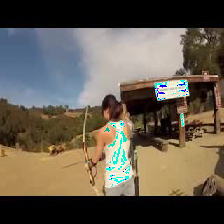

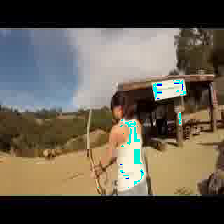

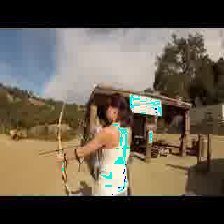

In [6]:

def plot_clips(clips, idxClip = 0, N_Frame = 3):
    from IPython.display import display
    print("Dimension of Clips: ", clips.shape)
    if clips.ndim == 4:
        clip = clips
    else:
        clip = clips[0]
    for idxFrame in range(0,N_Frame):
        img = Image.fromarray( (clip[idxFrame]*256).astype("uint8") )
        display(img)
        
print(images.shape)
plot_clips(images)

In [7]:
for _ in range(10):
    X,y  = next(generator);

In [8]:
def show_npndarray_as_gif(images):
    os.system("rm ./movie.gif")
    imageio.mimsave('./movie.gif', images)
#     display(HTML('<img src="./movie.gif">'))
    
X,y  = next(generator);

print(X.shape)

# show_npndarray_as_gif(X[17])

show_npndarray_as_gif(X[0])


(20, 5, 224, 224, 3)


/home/lab.analytics.northwestern.edu/yma/.conda/envs/dl/lib/python2.7/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float32 to uint8, range [0, 1]
  dtype_str, out_type.__name__))
